In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(10,10)

In [ ]:
df=pd.read_csv("/content/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.shape

(10841, 13)

In [ ]:
df.isnull().sum()
df1=df.dropna()

In [ ]:
df1.isnull().sum()
df1.shape

(9360, 13)

In [ ]:
df2=df1.drop(["Genres","Current Ver"],axis='columns')
df2.shape
df2.head(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,"March 26, 2017",2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,"April 26, 2018",4.0.3 and up


In [ ]:
df2.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
df2.Reviews.value_counts()
# type('Reviews')

2          83
3          78
5          74
4          74
1          67
           ..
1853        1
7657490     1
6342        1
21443       1
31621       1
Name: Reviews, Length: 5990, dtype: int64

In [ ]:
df2.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [ ]:
df2['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
df2.duplicated().value_counts()

False    8886
True      474
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Last Updated    9360 non-null   object 
 10  Android Ver     9360 non-null   object 
dtypes: float64(1), object(10)
memory usage: 877.5+ KB


In [ ]:
df3=df2.drop_duplicates() 

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Last Updated    8886 non-null   object 
 10  Android Ver     8886 non-null   object 
dtypes: float64(1), object(10)
memory usage: 833.1+ KB


**Data preprocessing**

In [ ]:
df3['Last Updated']=pd.to_datetime(df3['Last Updated'])
df3['before update']=df3['Last Updated'].max()-df3['Last Updated']
df3.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,before update
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,2018-01-07,4.0.3 and up,213 days
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,2018-01-15,4.0.3 and up,205 days
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,2018-08-01,4.0.3 and up,7 days
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,2018-06-08,4.2 and up,61 days
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,2018-06-20,4.4 and up,49 days


In [ ]:
# def convert(a):
#   try:
#     a=a.replace(',','').replace('+','')
#     return int(a)
#   except:
#     return None




In [ ]:
df3['Installs']=df3['Installs'].str.replace(',','').str.replace('+','').astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3['Reviews']=df3['Reviews'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3['Size']=df3['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,before update
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,2018-01-07,4.0.3 and up,213 days
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,2018-01-15,4.0.3 and up,205 days
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,2018-08-01,4.0.3 and up,7 days
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,2018-06-08,4.2 and up,61 days
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,2018-06-20,4.4 and up,49 days


In [ ]:
df3['Price']=df3['Price'].str.replace("$","").astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3.describe()

,Rating,Reviews,Size,Installs,Price,before update
count,8886.000000,8.886000e+03,8.886000e+03,8.886000e+03,8886.000000,8886
mean,4.187959,4.730928e+05,1.900066e+07,1.650061e+07,0.963526,258 days 23:30:59.554355164
std,0.522428,2.906007e+06,2.302342e+07,8.640413e+07,16.194792,400 days 23:08:49.623353924
min,1.000000,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0 days 00:00:00
25%,4.000000,1.640000e+02,2.500000e+06,1.000000e+04,0.000000,16 days 00:00:00
50%,4.300000,4.723000e+03,9.400000e+06,5.000000e+05,0.000000,72 days 00:00:00
75%,4.500000,7.131325e+04,2.700000e+07,5.000000e+06,0.000000,321 days 00:00:00
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000,3001 days 00:00:00


**DATA VISUALIZATION**

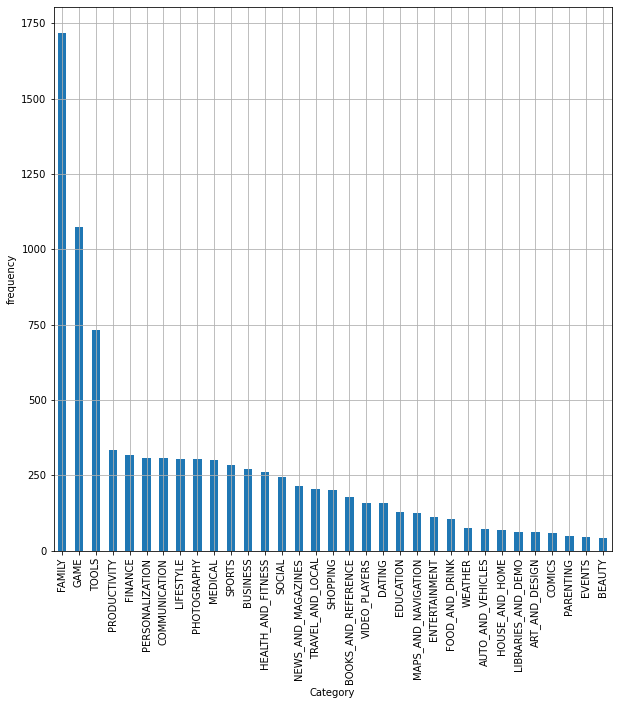

In [ ]:
plt.figure(figsize=(10,10))
df3['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('frequency')
plt.grid()
plt.show()

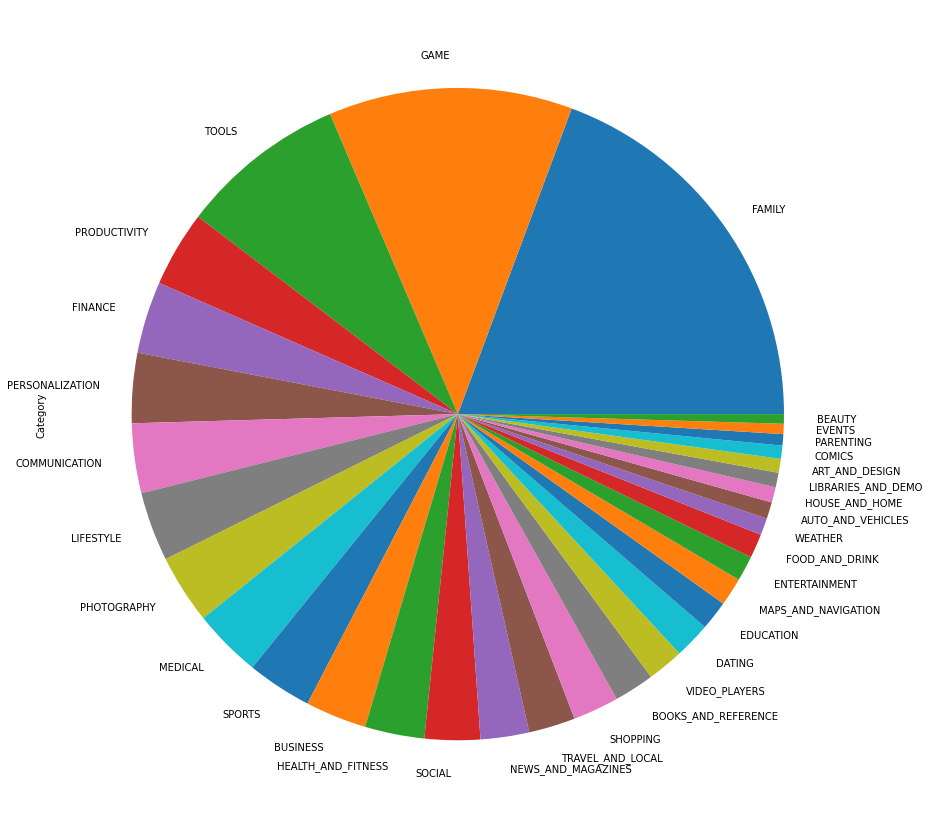

In [ ]:
plt.figure(figsize=(15,15))
df3['Category'].value_counts().plot(kind='pie')
plt.grid()
plt.show()

**DATA MODELLING**

In [ ]:
df3.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,before update
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,2018-01-07,4.0.3 and up,213 days
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,2018-01-15,4.0.3 and up,205 days


In [ ]:
data_model_x=df3.drop(['Last Updated','Android Ver','App','Rating'],axis='columns')


In [ ]:
data_model_y=df3['Rating']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data_model_x[['before update']])
data_model_x['before update']=scaler.transform(data_model_x[['before update']])
data_model_x.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,before update
0,ART_AND_DESIGN,159,19000000.0,10000,Free,0.0,Everyone,0.070976
1,ART_AND_DESIGN,967,14000000.0,500000,Free,0.0,Everyone,0.068311


In [ ]:
data_model_x_encode=pd.get_dummies(data_model_x,columns=['Category','Type','Content Rating'])
data_model_x_encode.head(1)

,Reviews,Size,Installs,Price,before update,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159,19000000.0,10000,0.0,0.070976,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_model_x_encode,data_model_y,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
prediction=pd.DataFrame(y_test)
prediction.head()

,Rating
608,4.7
7786,4.0
7856,4.2
8089,4.5
7886,3.5


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso

In [ ]:
LR=LinearRegression()
LR.fit(x_train,y_train)
LR.predict(x_test)

array([3.9789434 , 4.04437308, 4.15228324, ..., 4.19687406, 4.1358389 ,
       4.15244046])

In [ ]:
prediction['Linear_R']=LR.predict(x_test)
prediction['Linear_R']=round(prediction['Linear_R'],1)
prediction.head(20)

,Rating,Linear_R
608,4.7,4.0
7786,4.0,4.0
7856,4.2,4.2
8089,4.5,4.1
7886,3.5,3.9
1877,4.7,4.3
1763,4.7,4.4
3423,4.1,4.4
2079,4.5,4.2
4259,3.5,4.2
